In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import geopandas as gpd
 
from weavingspace import WeaveUnit
from weavingspace import Tiling

from weavingspace import tiling_utils

import shapely.affinity as affine

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

## Triaxial weave

In [11]:
w2_a1 = WeaveUnit(weave_type = "cube", spacing = 1000, aspect = .9,
                  strands = "a|b|c", crs = ak.crs, 
                  # debug = True
                  )
# w2_a09 = WeaveUnit(weave_type = "cube", spacing = 100, aspect = .9,
#                   strands = "a|b|c", crs = ak.crs, debug = True)

Tileable constructor debugging messages enabled
Triaxial weave type: 'cube', calling 
                      _setup_triaxial_weave_unit()
_setup_triaxial_weave_unit(): Loom(indices=[(0, 2, 5), (0, 3, 4), (0, 3, 5), (0, 4, 3), (0, 4, 4), (0, 5, 2), (0, 5, 3), (1, 1, 5), (1, 2, 4), (1, 2, 5), (1, 3, 3), (1, 3, 4), (1, 4, 2), (1, 4, 3), (1, 5, 1), (1, 5, 2), (2, 0, 5), (2, 1, 4), (2, 1, 5), (2, 2, 3), (2, 2, 4), (2, 3, 2), (2, 3, 3), (2, 4, 1), (2, 4, 2), (2, 5, 0), (2, 5, 1), (3, 0, 4), (3, 0, 5), (3, 1, 3), (3, 1, 4), (3, 2, 2), (3, 2, 3), (3, 3, 1), (3, 3, 2), (3, 4, 0), (3, 4, 1), (3, 5, 0), (4, 0, 3), (4, 0, 4), (4, 1, 2), (4, 1, 3), (4, 2, 1), (4, 2, 2), (4, 3, 0), (4, 3, 1), (4, 4, 0), (5, 0, 2), (5, 0, 3), (5, 1, 1), (5, 1, 2), (5, 2, 0), (5, 2, 1), (5, 3, 0)], orderings=[(0, 2, 1), (2, 1, 0), (1, 0, 2), (1, 0, 2), (2, 1, 0), (0, 2, 1), (0, 2, 1), (2, 1, 0), (1, 0, 2), (2, 1, 0), (0, 2, 1), (0, 2, 1), (2, 1, 0), (1, 0, 2), (1, 0, 2), (2, 1, 0), (1, 0, 2), (0, 2, 1), (0, 2, 1), (2, 

IndexError: index out of range

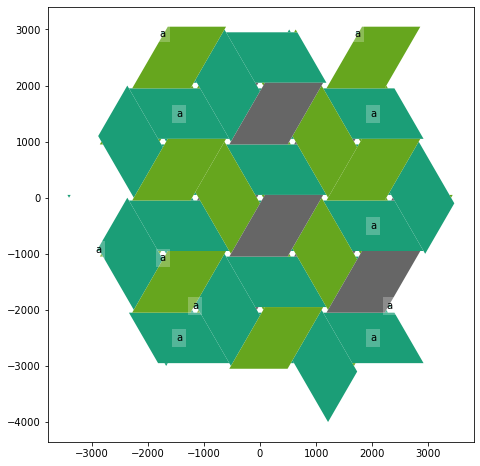

In [12]:
w2_a1.plot()

(109, 3)

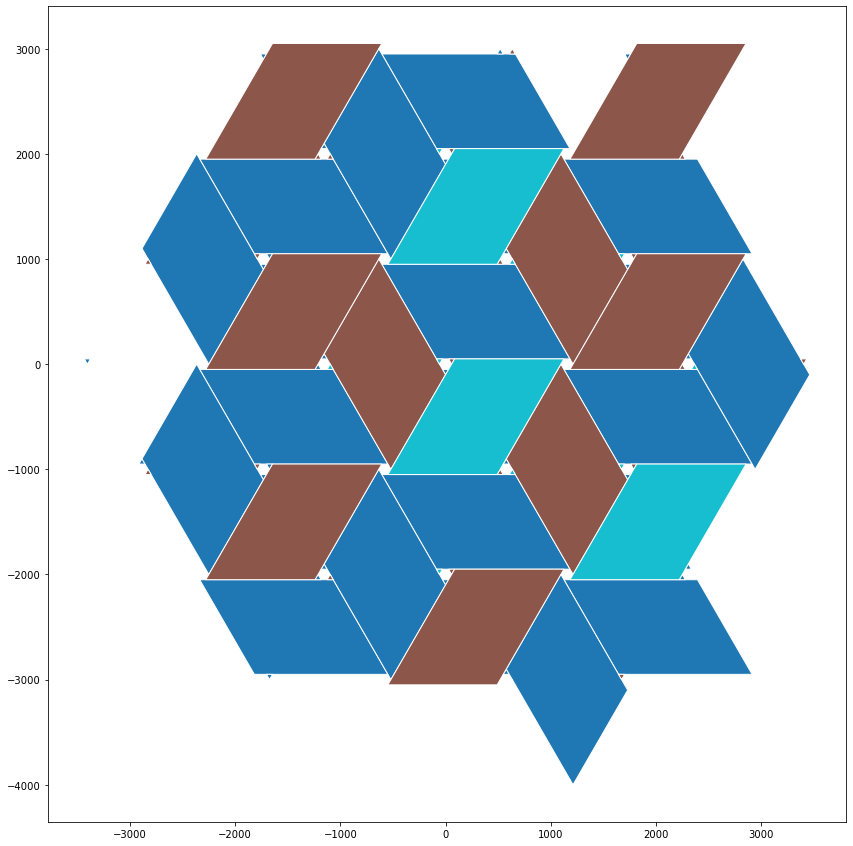

In [15]:
w2_a1.elements["id"] = [i for i in range(w2_a1.elements.shape[0])]
w2_a1.elements.plot(column = "element_id", figsize = (15, 15), ec = "w")
w2_a1.elements.shape

In [ ]:
v = w2_a1.get_vectors()[1]
p1 = w2_a1.elements.geometry[1]
p2 = w2_a1.elements.geometry[2]
gs = gpd.GeoSeries([p1, p2])
gs.plot()

In [ ]:
tiling_utils.touch_along_an_edge(p1, p2)

In [ ]:
c1 = [p for p in p1.exterior.coords]
c2 = [p for p in p2.exterior.coords]
c1[:-1], c2[:-1]

In [ ]:
c1

In [ ]:
DIE DIE DIE

In [ ]:
weave2 = Tiling(w2, ak, id_var = "DZ2018")

In [ ]:
textile2 = weave2.get_tiled_map(# prioritise_tiles = True, ragged_edges = True,
                                debug = True)

In [ ]:
textile2.variables = dict(zip(list("acdfgi"),
                              [x for x in ak if "Rank" in x]))
textile2.colourmaps = dict(zip(textile2.variables.values(),
                               ("BrBG", "RdGy", "RdYlBu", "Spectral",
                                "PiYG", "PRGn", "PuOr", "viridis")))

In [ ]:
fig = textile2.render(legend = True)